In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_343.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_739.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_182.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_661.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_199.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_20.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_288.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_83.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_842.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_612.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_284.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_305.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_829.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_393.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_98.jpg
/kaggle/input

In [1]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


modules loaded


/tmp/ipykernel_42/2423133124.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [3]:
def apply_filters(image_path):
    img = cv2.imread(image_path, 0) 
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  
    clahe_img = clahe.apply(img)  

    median_filtered_img = cv2.medianBlur(clahe_img, 5)  

    return median_filtered_img


dataset_path = '/kaggle/input/brain-tumors-256x256'


output_path = '/kaggle/working/filtered-data'


if not os.path.exists(output_path):
    os.makedirs(output_path)


for root, dirs, files in os.walk(dataset_path):
    for dir_name in dirs:
        folder_path = os.path.join(root, dir_name)
        output_folder_path = folder_path.replace(dataset_path, output_path)
        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)

    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            image_path = os.path.join(root, file)
            output_folder = root.replace(dataset_path, output_path)
            output_img = apply_filters(image_path)
            output_filename = os.path.join(output_folder, file)
            cv2.imwrite(output_filename, output_img)  

In [2]:
# os.chdir('/kaggle/working/filtered-data/Data/glioma_tumor')
os.chdir('/kaggle/input/brain-tumors-256x256/Data/glioma_tumor')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(128,128))
      X.append(img)
      y.append("glioma_tumor")
print(len(y))
print(len(X))

  0%|          | 0/901 [00:00<?, ?it/s]

901
901


In [3]:
#os.chdir('/kaggle/working/filtered-data/Data/meningioma_tumor')
os.chdir('/kaggle/input/brain-tumors-256x256/Data/meningioma_tumor')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(128,128))
      X.append(img)
      y.append('meningioma_tumor')
print(len(y))
print(len(X))    

  0%|          | 0/913 [00:00<?, ?it/s]

1814
1814


In [4]:
# os.chdir('/kaggle/working/filtered-data/Data/normal')
os.chdir('/kaggle/input/brain-tumors-256x256/Data/normal')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(128,128))
      X.append(img)
      y.append('normal')
print(len(y))
print(len(X))    

  0%|          | 0/438 [00:00<?, ?it/s]

2252
2252


In [5]:
# os.chdir('/kaggle/working/filtered-data/Data/pituitary_tumor')
os.chdir('/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(128,128))
      X.append(img)
      y.append('pituitary_tumor')
print(len(y))
print(len(X))    

  0%|          | 0/844 [00:00<?, ?it/s]

3096
3096


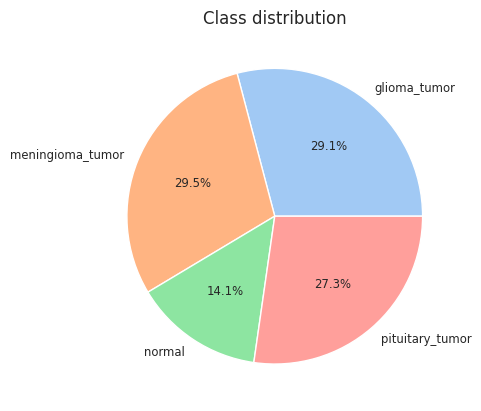

In [6]:
unique, counts = np.unique(y, return_counts=True)
plt.pie(x=counts, labels=unique, autopct='%.1f%%', textprops={'size': 'smaller'},
        colors=sns.color_palette('pastel')[0:len(unique)])
plt.title("Class distribution")
plt.show()

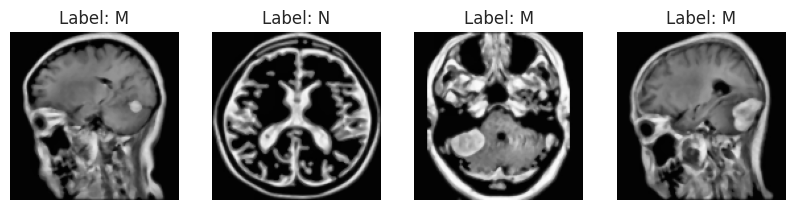

In [9]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Assuming X is your image array and y is your label array
num_images = len(X)

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    random_index = np.random.randint(num_images)  # Get a random index
    plt.imshow(X[random_index], cmap="gray")
    plt.title(f"Label: {y[random_index]}")  # Print the label on the image
    plt.axis('off')
plt.show()

# **Data Preprocess**

In [10]:
le = preprocessing.LabelEncoder()
y_1d = le.fit_transform(y)
y_one_hot = tf.keras.utils.to_categorical(y_1d, num_classes=4)

In [11]:
X = np.array(X)
y_encoded = np.array(y_one_hot)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Training set:")
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("\nTest set:")
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

Training set:
X_train shape:  (2476, 128, 128, 3)
y_train shape:  (2476, 4)

Test set:
X_test shape:  (620, 128, 128, 3)
y_test shape:  (620, 4)


# **Data Augmentation**

In [13]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Assuming X_train and y_train are your image and label arrays
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

X_train_augmented = []
y_train_augmented = []

for _ in range(3):  
    for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=X_train.shape[0]):
        X_train_augmented.append(x_batch)
        y_train_augmented.append(y_batch)
        break  

X_train_augmented = np.concatenate(X_train_augmented)  
y_train_augmented = np.concatenate(y_train_augmented)  

In [14]:
# Print the shapes
print("Shape of X_train_augmented:", X_train_augmented.shape)
print("Shape of y_train_augmented:", y_train_augmented.shape)

Shape of X_train_augmented: (7428, 128, 128, 3)
Shape of y_train_augmented: (7428, 4)


In [15]:
from sklearn.utils import shuffle

# Combine original data with augmented data
X_train_combined = np.concatenate((X_train, X_train_augmented))
y_train_combined = np.concatenate((y_train, y_train_augmented))


X_train_combined, y_train_combined = shuffle(X_train_combined, y_train_combined, random_state=42)
print(X_train_combined.shape)
print(y_train_combined.shape)

(9904, 128, 128, 3)
(9904, 4)


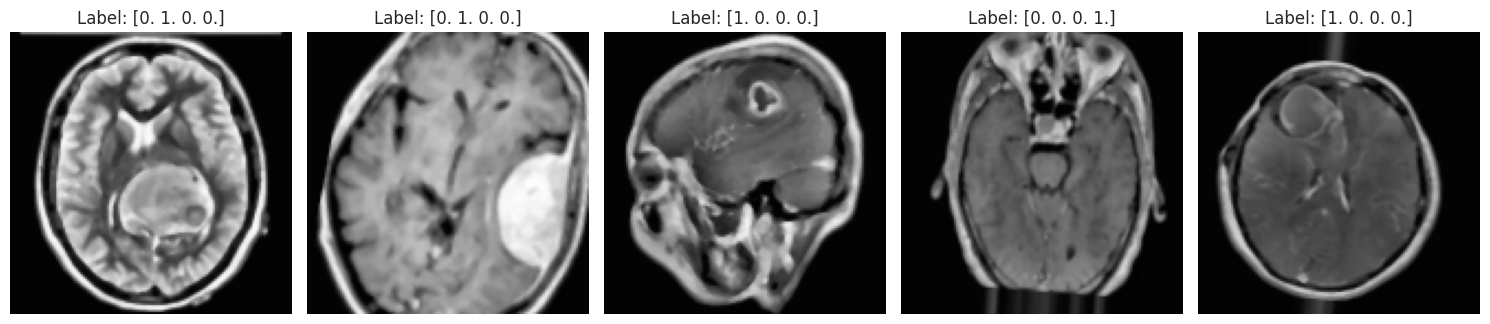

In [16]:
import random
import matplotlib.pyplot as plt
def display_random_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 5))
    indices = random.sample(range(len(images)), num_images)
    for i, index in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index].astype('uint8'))  
        plt.title(f"Label: {labels[index]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

num_random_images = 5  
display_random_images(X_train_combined, y_train_combined, num_random_images)


# **EfficientNetV2B3 with hyper parameter tuning & cross validation**

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
import kerastuner as kt
import tensorflow as tf

def build_model_mobilenetv2(hp):
    mobilenet_base  = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    for layer in mobilenet_base.layers:
        layer.trainable = True
    
    model = models.Sequential()
    model.add(mobilenet_base)
    model.add(layers.Flatten())
    
    # Tune FC layer units and dropout rate
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=512, step=32), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=128, step=32), activation='relu'))
    #model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(4, activation='softmax'))
    
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()
    ]
    model.compile(
        optimizer = tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-3, 1e-4,1e-5])),
        loss =  "categorical_crossentropy",
        metrics=metrics
    )
    
    return model

# **Cross folding in hp tuner EfficientNetV2B3**

In [24]:
objective = kt.Objective(
    name="val_accuracy",
    direction="max")
# Initialize tuner
tuner_mobilenetv2 = kt.GridSearch(
    build_model_mobilenetv2,
    objective=objective,
    max_trials=9,
    executions_per_trial=1,
    directory='brain_tumor_mobilenetv2',
    project_name='BrainTumor')


tuner_mobilenetv2.search(X_train_combined, y_train_combined, epochs=15, validation_split=0.2)

# Get the optimal hyperparameters
best_hps_mobilenetv2=tuner_mobilenetv2.get_best_hyperparameters(num_trials=1)[0]

Trial 9 Complete [00h 03m 42s]
val_accuracy: 0.8914689421653748

Best val_accuracy So Far: 0.9490156769752502
Total elapsed time: 00h 32m 49s


In [26]:
print(f"The optimal number of units in the first densely-connected layer is {best_hps_mobilenetv2.get('units')} and the optimal learning rate for the optimizer is {best_hps_mobilenetv2.get('learning_rate')}.")
best_model_mobilenetv2 = tuner_mobilenetv2.hypermodel.build(best_hps_mobilenetv2)
best_model_mobilenetv2.summary()

The optimal number of units in the first densely-connected layer is 96 and the optimal learning rate for the optimizer is 0.0001.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 20480)             0         
                                                                 
 dense_4 (Dense)             (None, 96)                1966176   
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_5 (Dense)             (None, 96)                9312      
                                                        

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_3 (Flatten)         (None, 20480)             0         
                                                                 
 dense_12 (Dense)            (None, 96)                1966176   
                                                                 
 dropout_6 (Dropout)         (None, 96)                0         
                                                                 
 dense_13 (Dense)            (None, 96)                9312      
                                                                 
 dropout_7 (Dropout)         (None, 96)                0         
                                                      

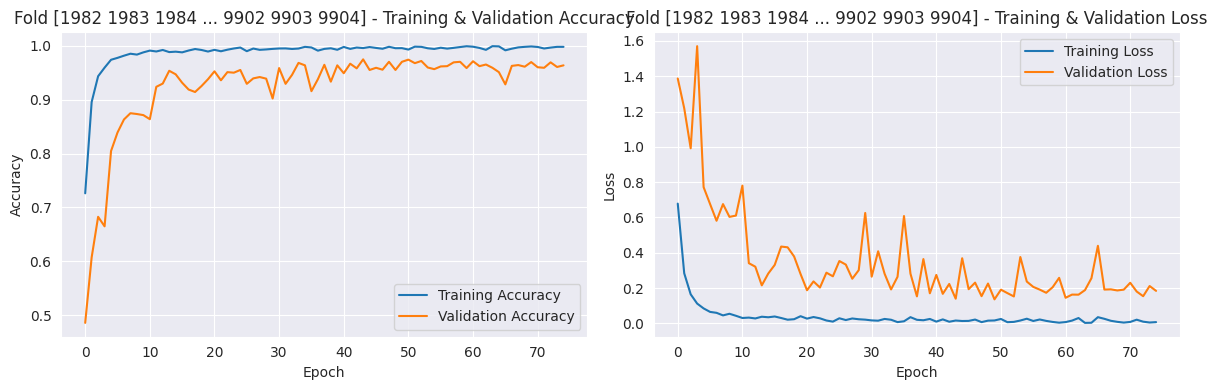

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_4 (Flatten)         (None, 20480)             0         
                                                                 
 dense_16 (Dense)            (None, 96)                1966176   
                                                                 
 dropout_8 (Dropout)         (None, 96)                0         
                                                                 
 dense_17 (Dense)            (None, 96)                9312      
                                                                 
 dropout_9 (Dropout)         (None, 96)                0         
                                                      

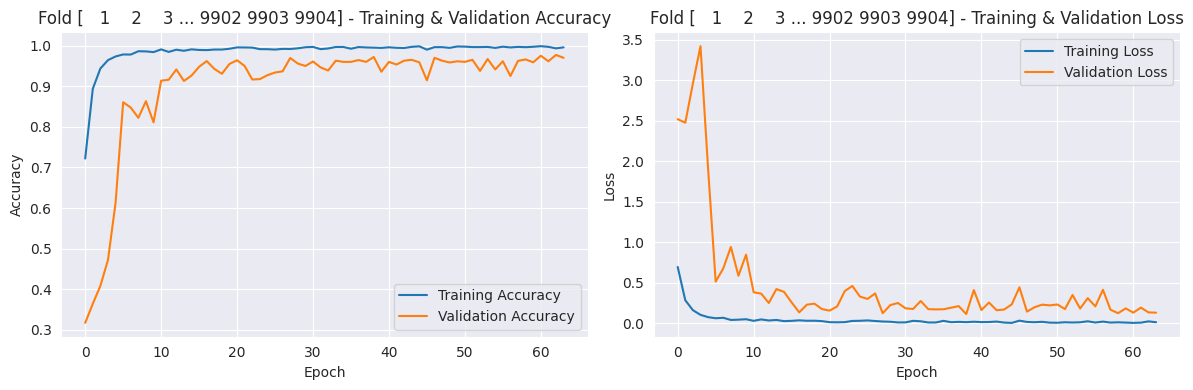

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_5 (Flatten)         (None, 20480)             0         
                                                                 
 dense_20 (Dense)            (None, 96)                1966176   
                                                                 
 dropout_10 (Dropout)        (None, 96)                0         
                                                                 
 dense_21 (Dense)            (None, 96)                9312      
                                                                 
 dropout_11 (Dropout)        (None, 96)                0         
                                                      

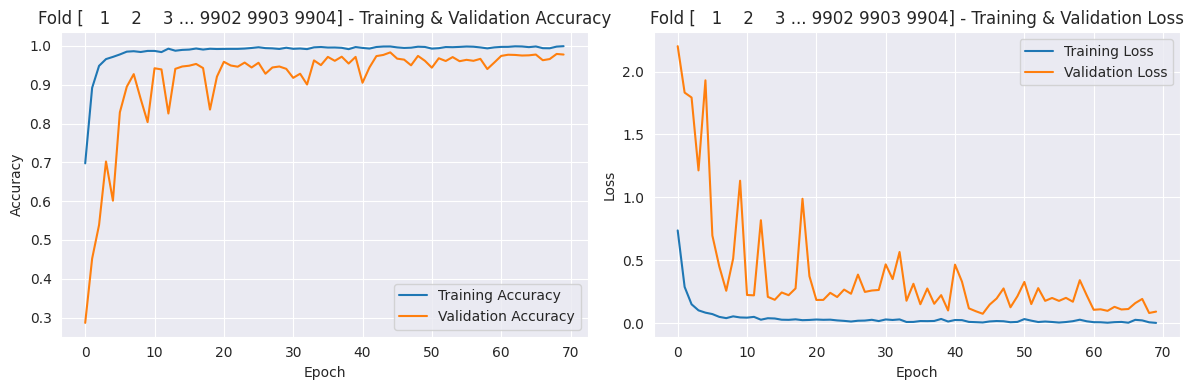

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_6 (Flatten)         (None, 20480)             0         
                                                                 
 dense_24 (Dense)            (None, 96)                1966176   
                                                                 
 dropout_12 (Dropout)        (None, 96)                0         
                                                                 
 dense_25 (Dense)            (None, 96)                9312      
                                                                 
 dropout_13 (Dropout)        (None, 96)                0         
                                                      

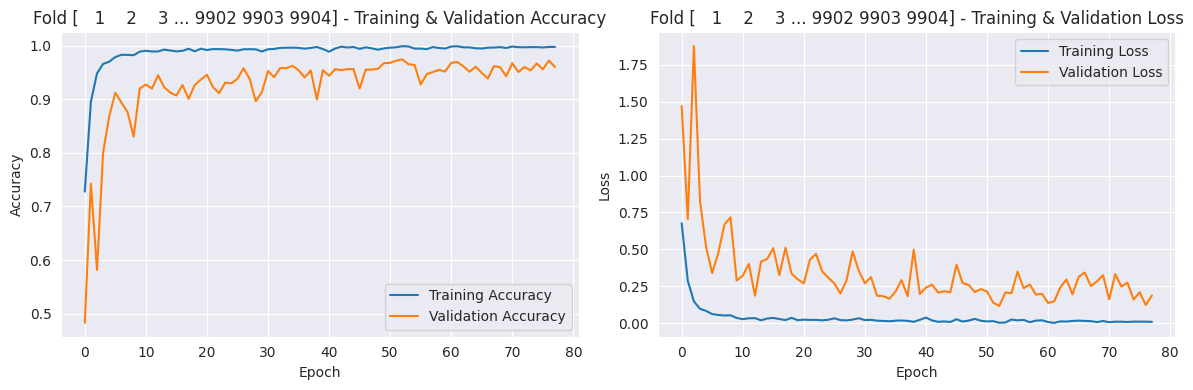

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_7 (Flatten)         (None, 20480)             0         
                                                                 
 dense_28 (Dense)            (None, 96)                1966176   
                                                                 
 dropout_14 (Dropout)        (None, 96)                0         
                                                                 
 dense_29 (Dense)            (None, 96)                9312      
                                                                 
 dropout_15 (Dropout)        (None, 96)                0         
                                                      

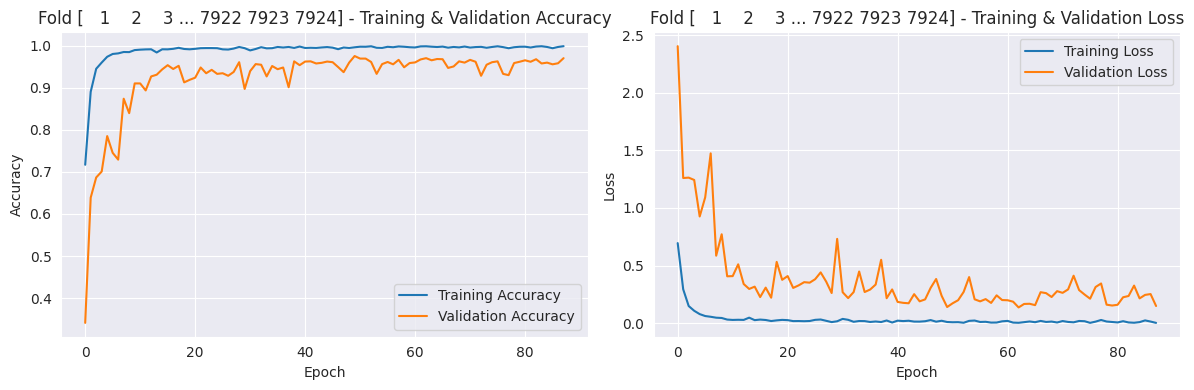

In [28]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

os.chdir('/kaggle/working/')
callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',patience=25, restore_best_weights=True,
    ),
     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=25, min_lr=0.0001)
]
best_val_score = -np.inf
best_model = None

# Use 5-fold cross-validation
kf = KFold(n_splits=5)

# Assuming X is your data and Y are your labels
for train_index, val_index in kf.split(X_train_combined):
    X_train, X_val = X_train_combined[train_index], X_train_combined[val_index]
    Y_train, Y_val = y_train_combined[train_index], y_train_combined[val_index]
    
    best_model_mobilenetv2 = tuner_mobilenetv2.hypermodel.build(best_hps_mobilenetv2)
    best_model_mobilenetv2.summary()
    
    history_mobilenetv2= best_model_mobilenetv2.fit(X_train, Y_train, epochs=100,batch_size=32,validation_data=(X_val,Y_val),callbacks=callbacks)
    
    eval_mobilenetv2= best_model_mobilenetv2.evaluate(X_test,y_test)
    print(f"Evaluation Acc for current fold = {eval_mobilenetv2}")
    
    # Get the validation score for this fold
    val_score = np.mean(history_mobilenetv2.history['val_accuracy'])
    
    if val_score > best_val_score:
        best_val_score = val_score
        best_model = best_model_mobilenetv2

    # Plotting the accuracy and loss for this fold
    plt.figure(figsize=(12, 4))
    
    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_mobilenetv2.history['accuracy'], label='Training Accuracy')
    plt.plot(history_mobilenetv2.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {train_index+1} - Training & Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_mobilenetv2.history['loss'], label='Training Loss')
    plt.plot(history_mobilenetv2.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {train_index+1} - Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

best_model.save('/kaggle/working/best_model_mobilenetv2_kf.h5')

20/20 [==============================] - 1s 11ms/step


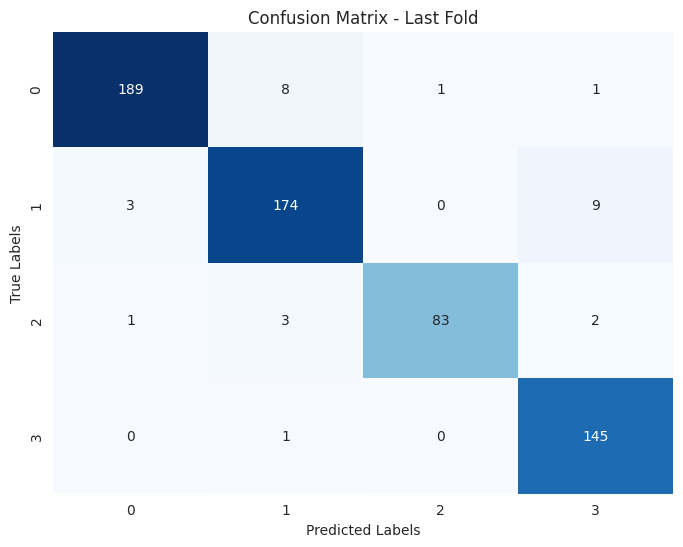

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have predictions from the best model on X_test
predictions = best_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Last Fold')
plt.show()


20/20 [==============================] - 0s 11ms/step


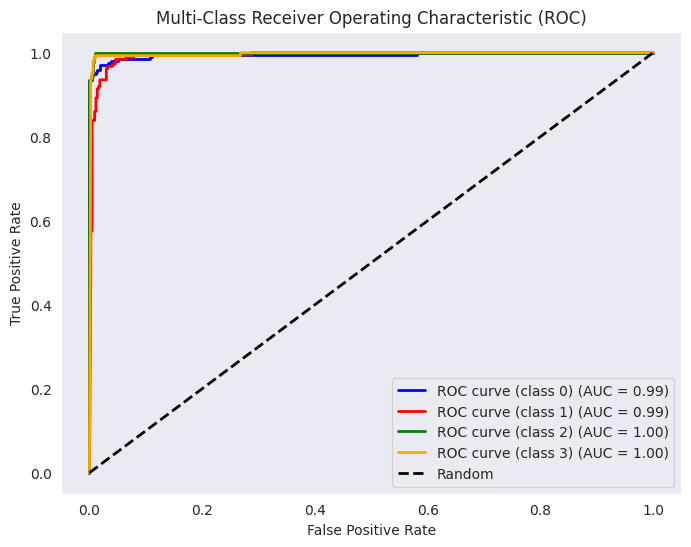

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming best_model is your trained Keras Sequential model
# Assuming X_test holds your test data and y_test holds your true labels

# Get the predicted probabilities for each class
predicted_probabilities = best_model.predict(X_test)

# Binarize the true labels
num_classes = 4
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

# Initialize variables for ROC and AUC calculation
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and ROC area for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange'])  # Adjust the colors for more classes
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC)')
plt.legend(loc='best')
plt.grid()
plt.show()
